## Linear and Logistical Regression on Airbnb datasets

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
# Pre-processed with dimensionality reduction
abnb_listings = pd.read_csv("abnb_listings_rdcd.csv")
del abnb_listings["Unnamed: 0"]
abnb_listings.rename(columns={'review_scores_rating': 'rating'}, inplace=True)

In [2]:
abnb_listings.head()

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month
0,1162609,37.785217,-122.488655,11.875956,Lovely One Bedroom Apartment This is a big wel...,-1.319244,386.666667,1,89,0.28
1,6938818,37.781505,-122.504754,11.875956,Best Secret in Town Convenience is the key for...,-1.416978,142.333333,1,92,2.33
2,4781448,37.781797,-122.492492,11.875955,3 Bd 2.5 Ba Full Flat Condo w Views Our family...,5.781405,940.000000,1,100,0.36
3,1931937,37.781564,-122.494424,11.875955,Blocks from GG Park & Ocean Beach Large 2BD ap...,-1.404158,136.666667,1,94,1.13
4,2134100,37.783888,-122.508557,11.875958,Ocean Beach hilltop cottage Newly built cottag...,-1.582193,178.333333,1,92,6.09


# Do linear regression with space, price, host, rating

In [3]:
X = abnb_listings[['space', 'price', 'host', 'rating']]
abnb_listings['reviews_per_month_linear'] = abnb_listings['reviews_per_month']
abnb_listings['reviews_per_month_logistic'] = abnb_listings['reviews_per_month_linear'] > 3

/Users/tonyktan/Desktop/GA/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


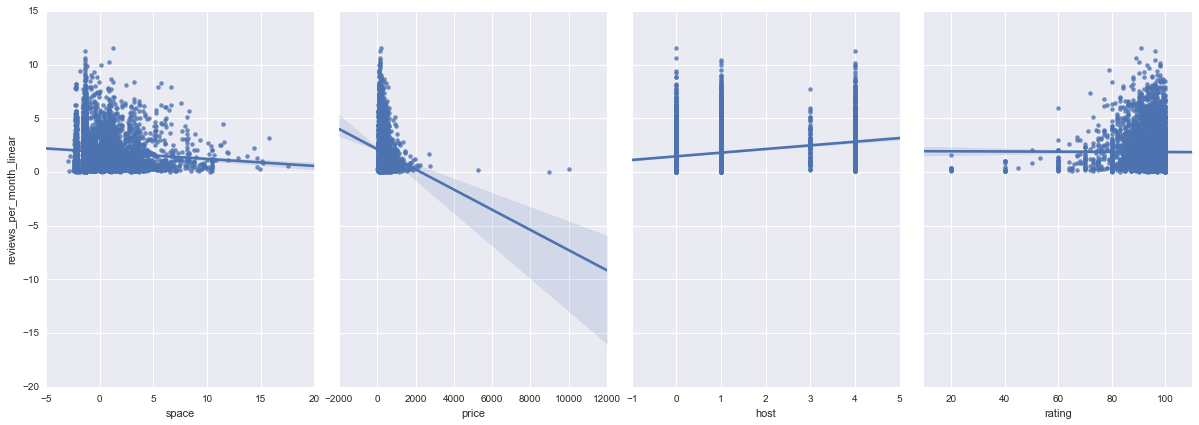

In [4]:
sns.pairplot(abnb_listings, x_vars=['space', 'price', 'host', 'rating'], 
             y_vars='reviews_per_month_linear', size=6, aspect=0.7, kind='reg')

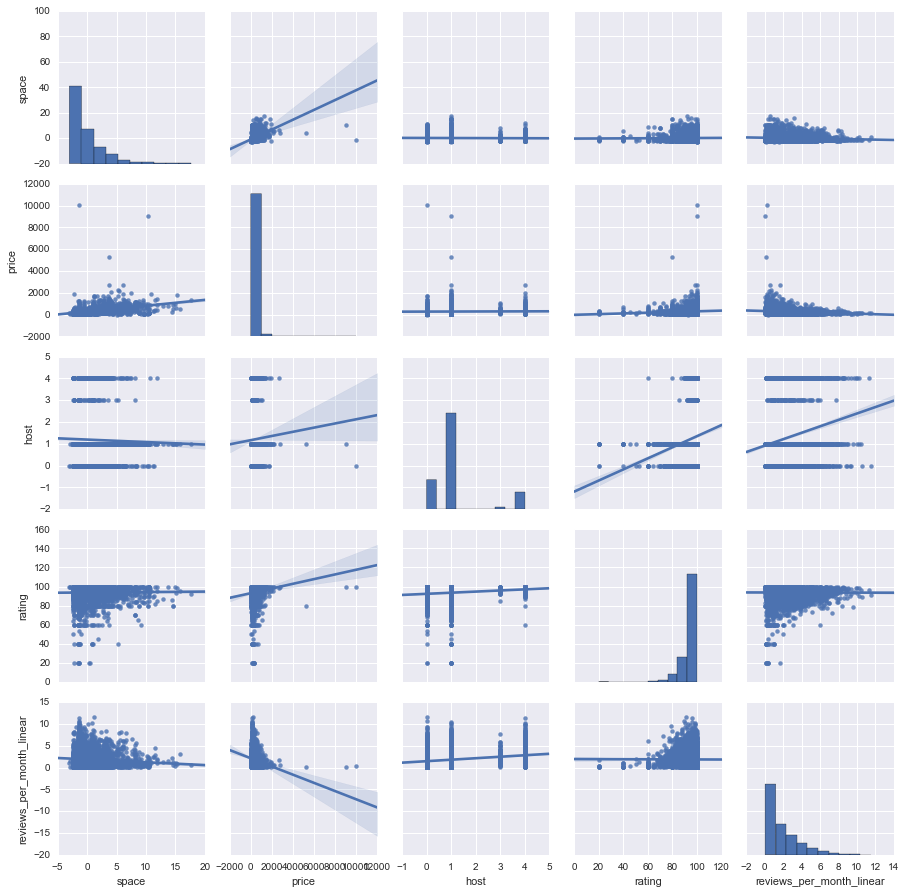

In [5]:
sns.pairplot(abnb_listings[['space', 'price', 'host', 'rating', 'reviews_per_month_linear']], kind='reg')

In [6]:
abnb_listings[['space', 'price', 'host', 'rating', 'reviews_per_month_linear']].corr()

,space,price,host,rating,reviews_per_month_linear
space,1.000000,0.454692,-0.023968,0.014448,-0.089598
price,0.454692,1.000000,0.023512,0.088815,-0.151950
host,-0.023968,0.023512,1.000000,0.172558,0.223566
rating,0.014448,0.088815,0.172558,1.000000,-0.003786
reviews_per_month_linear,-0.089598,-0.151950,0.223566,-0.003786,1.000000


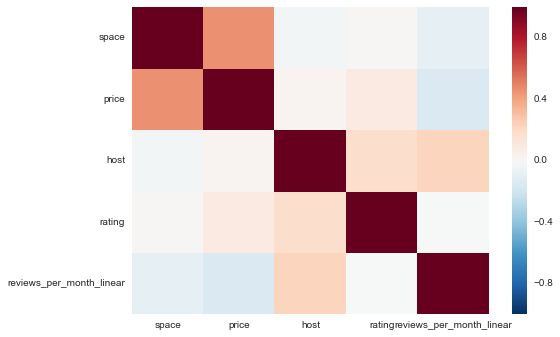

In [7]:
sns.heatmap(abnb_listings[['space', 'price', 'host', 'rating', 'reviews_per_month_linear']].corr())

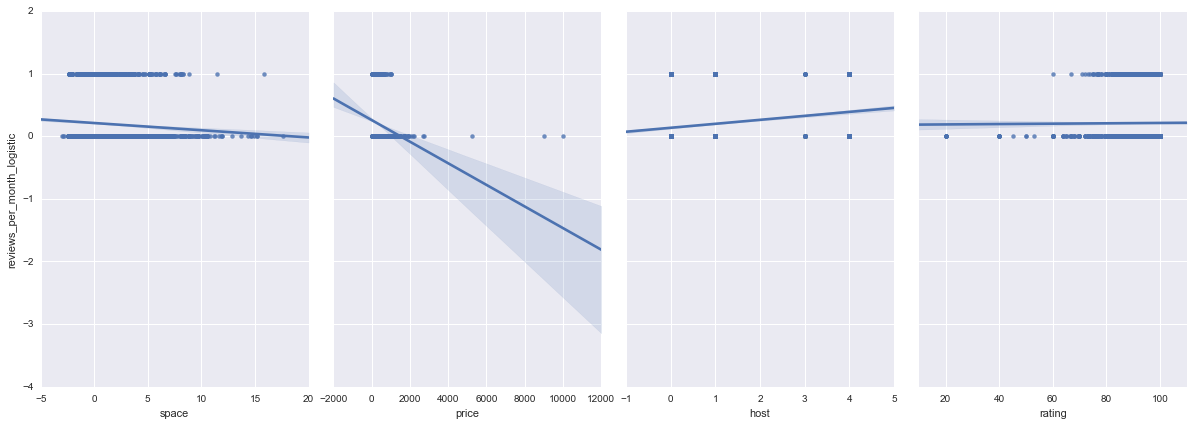

In [8]:
sns.pairplot(abnb_listings, x_vars=['space', 'price', 'host', 'rating'], 
             y_vars='reviews_per_month_logistic', size=6, aspect=0.7, kind='reg')

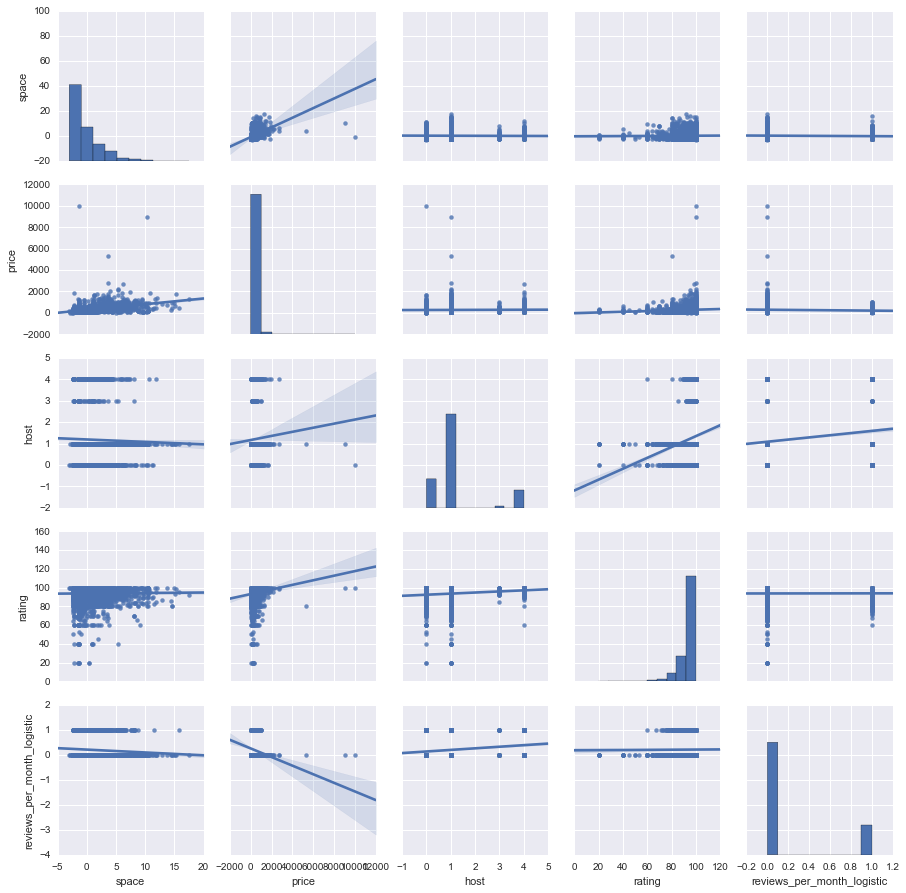

In [9]:
sns.pairplot(abnb_listings[['space', 'price', 'host', 'rating', 
                            'reviews_per_month_logistic']], kind='reg')

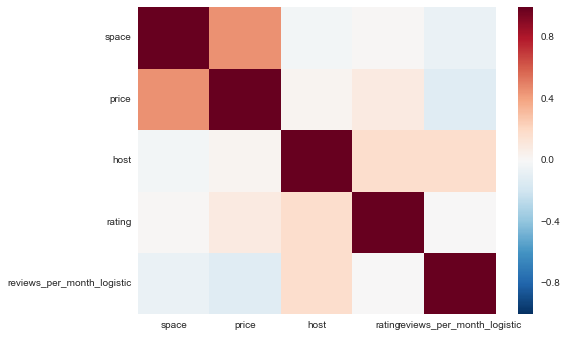

In [10]:
sns.heatmap(abnb_listings[['space', 'price', 'host', 'rating', 'reviews_per_month_logistic']].corr())

# Do logistic regression

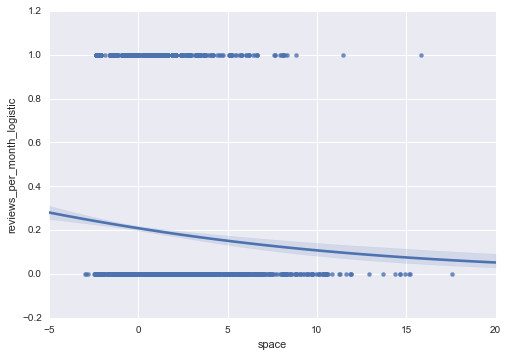

In [18]:
from sklearn import linear_model

X = abnb_listings[['space', 'price', 'host', 'rating']]
y = abnb_listings[['reviews_per_month_logistic']]

sns.regplot(x='space', y='reviews_per_month_logistic', data=abnb_listings,logistic=True)

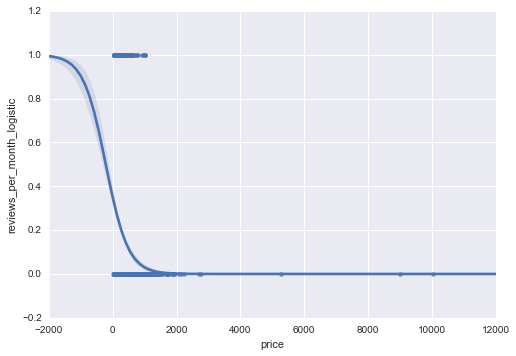

In [19]:
sns.regplot(x='price', y='reviews_per_month_logistic', data=abnb_listings,logistic=True)

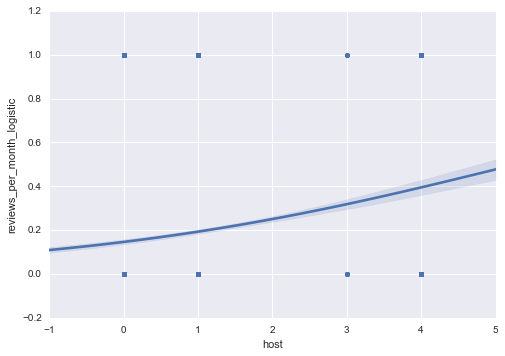

In [21]:
sns.regplot(x='host', y='reviews_per_month_logistic', data=abnb_listings,logistic=True)

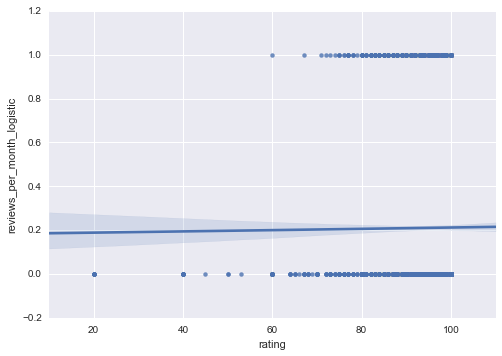

In [22]:
sns.regplot(x='rating', y='reviews_per_month_logistic', data=abnb_listings,logistic=True)

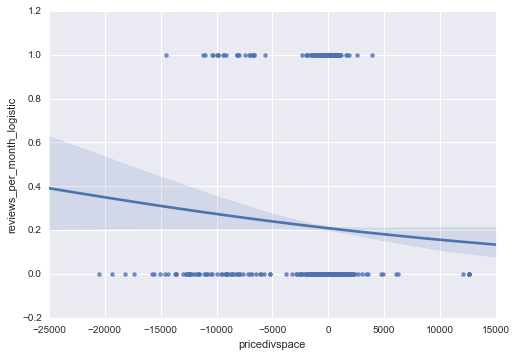

In [23]:
abnb_listings["pricedivspace"] = abnb_listings.price/abnb_listings.space
sns.regplot(x="pricedivspace", y='reviews_per_month_logistic', data=abnb_listings,logistic=True)

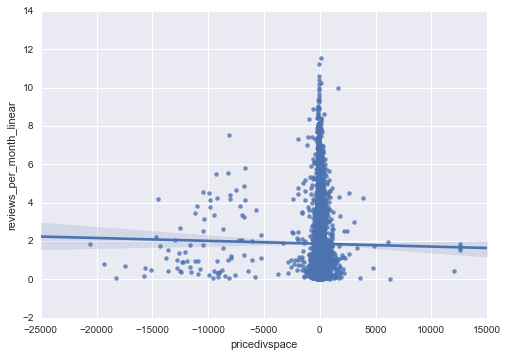

In [24]:
sns.regplot(x="pricedivspace", y='reviews_per_month_linear', data=abnb_listings)